# **TUGAS 4 - KLASIFIKASI DATA**

## **Crawling Data Berita Online**

In [ ]:
pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrap(data_list, category, start_page=5):
    page_number = start_page

    while len(data_list) < 370:
        url = f"https://www.antaranews.com/{category}/{page_number}"
        req = requests.get(url)
        soup = BeautifulSoup(req.text, 'html.parser')
        items = soup.findAll('article', {'class': 'simple-post simple-big clearfix'})

        for item in items:
            link = item.find('a')['href']
            response = requests.get(link)
            html = response.text

            soup = BeautifulSoup(html, 'html.parser')
            judul_elem = soup.find('h1', class_="post-title")
            article = soup.find('div', class_="post-content clearfix")
            if article:
                article_text = article.get_text()
                judul = judul_elem.text
                data_list.append([judul, article_text, category])

        page_number += 1  # Naikkan nomor halaman untuk mengambil halaman berikutnya

        if page_number > 500:  # Pastikan untuk menghentikan jika nomor halaman melebihi batas yang ada
            break

hukum=[]
hiburan=[]
olahraga=[]

scrap(hukum, 'hukum')
scrap(hiburan, 'hiburan')
scrap(olahraga, 'olahraga')

In [ ]:
import pandas as pd
# Buat DataFrame untuk setiap kategori
df_hukum = pd.DataFrame(hukum, columns=['judul', 'isi', 'label'])
df_hiburan = pd.DataFrame(hiburan, columns=['judul', 'isi', 'label'])
df_olahraga = pd.DataFrame(olahraga, columns=['judul', 'isi', 'label'])

# Gabungkan DataFrame untuk setiap kategori menjadi satu DataFrame tunggal
df_combined = pd.concat([df_hukum, df_hiburan, df_olahraga], ignore_index=True)

# Simpan DataFrame ke dalam file CSV
df_combined.to_csv('gabungan_berita.csv', index=False)

In [ ]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('Data Berita.csv')

# Tampilkan lima baris pertama DataFrame
print(df.head())

## **Crawling Data Twitter**

## Crawl Data Twitter > 1500 Tweets
The crawling process was done using Tweet-Harvest. Written by Helmi Satria on October 18th.

In [ ]:
#@title Twitter Auth Token

twitter_auth_token = 'b658171d59fbe52c230e73f9d89dbe6c9dba0a40'

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [633 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,036 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://p

In [ ]:
# Crawl Data

filename = 'makanan.csv'
search_keyword = 'makanan lang:id'
limit = 540

!npx --yes tweet-harvest@2.2.8 -o "{filename}" -s "{search_keyword}" -l {limit} --token {twitter_auth_token}


Welcome to the Twitter Crawler 🕷️

This script uses Chromium Browser to crawl data from Twitter with *your* Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


up to date, audited 4 packages in 814ms

found 0 vulnerabilities
Installing dependencies...
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://deb.nodesource.com/node_20.x nodistro InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,304 kB]
Hit:9 https://ppa.lau

In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=";")

# Display the DataFrame
display(df)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Dec 11 16:39:02 +0000 2023,1734251454192636394,@chikinpie0 fafaaa!!! you did well!! makasih d...,0.0,0.0,0,0.0,in,1231953271650017280,1734242563224441142,khionriyu,https://twitter.com/khionriyu/status/173425145...
1,Mon Dec 11 16:38:45 +0000 2023,1734251382637830347,@MakassarFess Makanan kucing hahahah,0.0,0.0,0,0.0,in,3184784904,1734250885994418342,yuknowwhater,https://twitter.com/yuknowwhater/status/173425...
2,Mon Dec 11 16:38:41 +0000 2023,1734251365487227231,@melanieppuchino Kalo di sekolah anakku dulu w...,0.0,0.0,0,0.0,in,293711629,1734238700413014350,sheknowshoney,https://twitter.com/sheknowshoney/status/17342...
3,Mon Dec 11 16:38:28 +0000 2023,1734251313960280308,huruf t bulan agustus september oktober hari...,0.0,0.0,0,0.0,in,1393125771967811587,1734251313960280308,hyunminiee,https://twitter.com/hyunminiee/status/17342513...
4,Mon Dec 11 16:37:56 +0000 2023,1734251178052247676,@potabyj naaa kda jd kita makanan 🥺,0.0,0.0,0,0.0,in,241075748,1733878774754910421,_nirwaaan,https://twitter.com/_nirwaaan/status/173425117...
...,...,...,...,...,...,...,...,...,...,...,...,...
551,Mon Dec 11 14:59:38 +0000 2023,1734226439103459823,"@anotherjie IYAH, mana di rep nya ada slh 1 te...",0.0,0.0,0,0.0,in,1529616999839862784,1734202746394513823,doiknoyuu,https://twitter.com/doiknoyuu/status/173422643...
552,Mon Dec 11 14:59:35 +0000 2023,1734226429326594120,@SKYPAJI KAJOOO SEKALI LAGI HAPPY BIRTHDAY YAA...,0.0,1.0,1,1.0,in,1387280366273105921,1734179974901531130,iam_jihoonpark,https://twitter.com/iam_jihoonpark/status/1734...
553,Mon Dec 11 14:59:16 +0000 2023,1734226348359741805,"ᅠ Laper njrit, anterin makanan ke kos gua pli...",0.0,0.0,0,0.0,in,1289539963457925120,1734226348359741805,ROUVlN,https://twitter.com/ROUVlN/status/173422634835...
554,Mon Dec 11 14:59:16 +0000 2023,1734226346811998685,"@anxiovz soal makanan ak memang pelit, mff yhh...",0.0,1.0,0,0.0,in,1652535535079137281,1734223091067429045,nattajpg,https://twitter.com/nattajpg/status/1734226346...


In [ ]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 556.


## **Preprocessing**

Preprocessing adalah suatu tahap atau serangkaian langkah yang dilakukan pada data sebelum masuk ke dalam proses utama atau analisis lebih lanjut. Tujuan dari preprocessing adalah untuk mempersiapkan data agar lebih sesuai dan efektif untuk diproses oleh algoritma atau model yang akan digunakan. Beberapa tugas umum dalam preprocessing data melibatkan pembersihan data, transformasi data, pengurangan dimensi, dan normalisasi data

In [ ]:
import pandas as pd
import re
import numpy as np

### **Menampilkan Data**

Menampilkan data hasil crawlinng yang sudah disimpan di Github

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Nicolas271101/ppw/main/gabungan_beritabr.csv')
data

,judul,isi,label
0,Polda Jambi tangkap empat orang pelaku pemalsu...,\n\t\t\t\tJambi (ANTARA) - Direktorat Reserse ...,hukum
1,Polisi selidiki kasus 22 warga Garut korban pe...,\n\t\t\t\tGarut (ANTARA) - Kepolisian Resor Ga...,hukum
2,KPK siap hadapi gugatan praperadilan Eddy Hiariej,\n\t\t\t\tJakarta (ANTARA) - Komisi Pemberanta...,hukum
3,Banten siapkan jaksa khusus tangani pelanggara...,\n\n \n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\tANTAR...,hukum
4,Sembulungan dan Hinako resmi perkuat pertahana...,\n\n \n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\tANTAR...,hukum
...,...,...,...
1132,Indonesia Arena jadi saksi gelar tiga musim be...,\n\t\t\t\tJakarta (ANTARA) - Indonesia Arena m...,olahraga
1133,Menpora ajak media sukseskan Aquabike Jetski W...,\n\t\t\t\tMedan (ANTARA) - Menteri Pemuda dan ...,olahraga
1134,Bhullar kembali pimpin klasemen di putaran ked...,\n\t\t\t\tJakarta (ANTARA) - Pegolf India Gaga...,olahraga
1135,Ratusan atlet dayung perebutkan 45 medali emas...,\n\t\t\t\tJakarta (ANTARA) - Ratusan atlet day...,olahraga


### **Case Folding**

Case folding adalah suatu teknik dalam pengolahan teks yang digunakan untuk mengonversi semua karakter dalam suatu teks ke dalam bentuk huruf kecil atau huruf besar, tergantung pada kebutuhan. Tujuan utama dari case folding adalah untuk memastikan konsistensi dan keseragaman dalam pemrosesan teks, terlepas dari apakah teks tersebut awalnya ditulis dalam huruf besar, huruf kecil, atau kombinasi dari keduanya.

In [ ]:
lower_case_abstrak = data['isi'].str.lower()
lower_case_label = data['label'].str.lower()
data_lower_case = pd.DataFrame(lower_case_abstrak)
data_lower_case

,isi
0,\n\t\t\t\tjambi (antara) - direktorat reserse ...
1,\n\t\t\t\tgarut (antara) - kepolisian resor ga...
2,\n\t\t\t\tjakarta (antara) - komisi pemberanta...
3,\n\n \n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\tantar...
4,\n\n \n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\tantar...
...,...
1132,\n\t\t\t\tjakarta (antara) - indonesia arena m...
1133,\n\t\t\t\tmedan (antara) - menteri pemuda dan ...
1134,\n\t\t\t\tjakarta (antara) - pegolf india gaga...
1135,\n\t\t\t\tjakarta (antara) - ratusan atlet day...


### **Cleaning**

Cleaning (pembersihan) adalah serangkaian langkah atau tindakan yang diambil untuk membersihkan data dari potensi kesalahan atau ketidaksempurnaan. Tujuan utama proses pembersihan adalah untuk meningkatkan kualitas data sehingga analisis atau pemrosesan lebih akurat.

In [ ]:
# Cleaning
import re
clean = []

for i in range(len(lower_case_abstrak)):
    clean_tag = re.sub("@[A-Za-z0-9_]+", "", lower_case_abstrak[i])  # Cleansing mention
    clean_hashtag = re.sub("#[A-Za-z0-9_]+", "", clean_tag)  # Cleansing hashtag
    clean_https = re.sub(r'http\S+', '', clean_hashtag)  # Cleansing URL link
    clean_symbols = re.sub("[^a-zA-Zï ]+", " ", clean_https)  # Cleansing characters

    # Additional cleaning to remove '\n\t\t\t'
    clean_symbols = clean_symbols.replace('\n\t\t\t\t', '')

    clean.append(clean_symbols)

clean_result = pd.DataFrame(clean, columns=['Cleansing Isi'])

# Pembersihan whitespace beruntun
clean_result['Cleansing Isi'] = clean_result['Cleansing Isi'].apply(lambda x: re.sub(r'\s+', ' ', x))

clean_result

,Cleansing Isi
0,jambi antara direktorat reserse dan kriminal ...
1,garut antara kepolisian resor garut melakukan...
2,jakarta antara komisi pemberantasan korupsi k...
3,antara kepala kejaksaan tinggi banten didik f...
4,antara kapal angkatan laut kal sembulungan da...
...,...
1132,jakarta antara indonesia arena menjadi saksi ...
1133,medan antara menteri pemuda dan olahraga dito...
1134,jakarta antara pegolf india gaganjeet bhullar...
1135,jakarta antara ratusan atlet dayung dari prov...


### Stopword **Removal**

Stopwords (kata-kata penghenti) adalah kata-kata umum yang sering muncul dalam suatu bahasa dan dianggap kurang bermakna atau tidak memberikan kontribusi signifikan terhadap pemahaman teks. Kata-kata ini umumnya diabaikan atau dihapus saat melakukan analisis teks atau pemrosesan bahasa alami untuk mengurangi kompleksitas dan meningkatkan efisiensi.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Slang Word**

Membuat kamus slang words dan kata Indonesia yang benar

In [ ]:
# Membuat kamus slang words dan kata Indonesia yang benar
slang_dict = pd.read_csv("https://raw.githubusercontent.com/Nicolas271101/ppw/main/combined_slang_words.txt", sep=" ", header=None)

# Membuat fungsi untuk mengubah slang words menjadi kata Indonesia yang benar
def replace_slang_words(text):
    words = nltk.word_tokenize(text.lower())
    words_filtered = [word for word in words if word not in stopwords.words('indonesian')]
    for i in range(len(words_filtered)):
        if words_filtered[i] in slang_dict:
            words_filtered[i] = slang_dict[words_filtered[i]]
    return ' '.join(words_filtered)

# Contoh penggunaan

slang_words=[]
for i in range(len(clean)):
  slang = replace_slang_words(clean[i])
  slang_words.append(slang)

data_slang = pd.DataFrame(slang_words, columns=["Slang Word Corection"])
data_slang

,Slang Word Corection
0,jambi direktorat reserse kriminal khusus ditre...
1,garut kepolisian resor garut penyelidikan warg...
2,jakarta komisi pemberantasan korupsi kpk mengh...
3,kepala kejaksaan banten didik farkhan alisyahd...
4,kapal angkatan laut kal sembulungan hinako sen...
...,...
1132,jakarta indonesia arena saksi sman jakarta sev...
1133,medan menteri pemuda olahraga dito ariotedjo m...
1134,jakarta pegolf india gaganjeet bhullar memimpi...
1135,jakarta ratusan atlet dayung provinsi indonesi...


### **Stemming**

Stemming adalah proses untuk menghasilkan bentuk dasar atau akar kata dari kata-kata yang bervariasi dalam suatu teks. Tujuannya adalah untuk menggabungkan kata-kata yang memiliki akar kata yang sama sehingga dapat lebih mudah dianalisis atau diproses dalam berbagai aplikasi pemrosesan bahasa alami dan informasi teks.

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Steaming
# Membuat Steammer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

steaming = []
for i in range (len(slang_words)):
  stem = stemmer.stem(slang_words[i])
  steaming.append(stem)

data_steaming = pd.DataFrame(steaming, columns=["Steaming"])
data_steaming

,Steaming
0,jambi direktorat reserse kriminal khusus ditre...
1,garut polisi resor garut lidi warga kabupaten ...
2,jakarta komisi berantas korupsi kpk hadap guga...
3,kepala jaksa banten didik farkhan alisyahdi se...
4,kapal angkat laut kal sembulungan hinako senin...
...,...
1132,jakarta indonesia arena saksi sman jakarta sev...
1133,medan menteri pemuda olahraga dito ariotedjo a...
1134,jakarta golf india gaganjeet bhullar pimpin kl...
1135,jakarta ratus atlet dayung provinsi indonesia ...


### **Tokenizing**

Tokenizing adalah proses mengubah sebuah teks atau kalimat menjadi sejumlah unit yang lebih kecil, yang disebut sebagai “token”. Token dapat berupa kata, frasa, atau entitas lain yang lebih kecil, tergantung pada konteks dan jenis tokenisasi yang digunakan.

In [ ]:
# Tokenizing dan Stop Word
words = []
for i in range (len(steaming)):
  tokens = word_tokenize(steaming[i])
  listStopword =  set(stopwords.words('indonesian'))

  removed = []
  for t in tokens:
      if t not in listStopword:
          removed.append(t)

  words.append(removed)
  print(removed)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
gabung=[]
for i in range(len(words)):
  joinkata = ' '.join(words[i])
  gabung.append(joinkata)

result = pd.DataFrame(gabung, columns=['Join Kata'])
result

,Join Kata
0,jambi direktorat reserse kriminal khusus ditre...
1,garut polisi resor garut lidi warga kabupaten ...
2,jakarta komisi berantas korupsi kpk hadap guga...
3,kepala jaksa banten didik farkhan alisyahdi se...
4,kapal angkat laut kal sembulungan hinako senin...
...,...
1132,jakarta indonesia arena saksi sman jakarta sev...
1133,medan menteri pemuda olahraga dito ariotedjo a...
1134,jakarta golf india gaganjeet bhullar pimpin kl...
1135,jakarta ratus atlet dayung provinsi indonesia ...


In [ ]:
print(gabung)

['jambi direktorat reserse kriminal khusus ditreskrimsus polda jambi tangkap orang laku palsu murni bahan bakar minyak bbm desa samar camat pauh kabupaten sarolangun direktur reskrimsus polda jambi komisaris polisi christian tory jambi senin palsu murni bbm ilegal kamis anggota polisi perkara tkp wib tkp polisi temu aktivitas palsu murni bbm ilegal tim tindak tkp tangkap orang laku kerja palsu minyak orang laku mt e iw lp aman barang bukti tungku besi tedmon kapasitas liter blower mesin pompa selang buah jerigen kapasitas liter isi cair hitam rupa minyak bumi modus operasi terima minyak mentah duga bor minyak ilegal bawa lokasi murni tory giat murni hasil turun produk bensin minyak tanah solar dasar terang laku giat olah minyak masuk minyak mentah tungku besi panas api pipa besi hubung kipas blower panas jam tungku hubung pipa besi bak air dingin pipa turun minyak proses jam drum minyak mentah laku hasil drum bensin drum minyak tanah drum solar hasil palsu minyak mentah pasar laku masy

## **TF-IDF**

TF-IDF singkatan dari “Term Frequency-Inverse Document Frequency,” adalah suatu metode dalam pemrosesan teks dan analisis dokumen yang digunakan untuk menilai seberapa penting suatu kata dalam suatu dokumen terhadap keseluruhan koleksi dokumen. Metode ini menggabungkan dua komponen utama:

Term Frequency (TF): Mengukur seberapa sering suatu kata muncul dalam suatu dokumen. Rumusnya adalah:
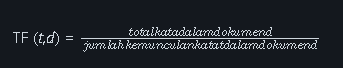


t = kata yang dievaluasi
d = dokumen


Inverse Document Frequency (IDF): Mengukur seberapa unik atau jarang kata tersebut muncul dalam keseluruhan koleksi dokumen. Rumusnya adalah:

IDF (*t,D*) = log $\frac {total dokumen dalam koleksi D}{jumlah dokumen yang mengandung kata t+1}$​

t = kata yang dievaluasi
D = koleksi dokumen
Setelah mendapatkan nilai TF dan IDF, nilai TF-IDF dihitung dengan mengalikan keduanya:


TF-IDF(t, d, D) = TF (t,d) x IDF (t,d)

In [ ]:
# TF-IDF
# TfidfVectorizer
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
count_wm = countvectorizer.fit_transform(gabung)
tfidf_wm = tfidfvectorizer.fit_transform(gabung)

#retrieve the terms found in the corpora
#if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference

count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
df_countvect

Count Vectorizer



,aa,aaba,aac,aah,aang,aaron,ab,aba,abaca,abad,...,zulfarshah,zulfikar,zulfikareditor,zulfikri,zulkarnaeni,zulkifli,zum,zumrotun,zverev,zyan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("\nTF-IDF Vectorizer\n")
df_tfidfvect


TF-IDF Vectorizer



,aa,aaba,aac,aah,aang,aaron,ab,aba,abaca,abad,...,zulfarshah,zulfikar,zulfikareditor,zulfikri,zulkarnaeni,zulkifli,zum,zumrotun,zverev,zyan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **PCA (Principal Component Analysis)**

PCA (Principal Component Analysis) adalah teknik reduksi dimensi yang digunakan dalam analisis data dan machine learning. Tujuan PCA adalah mengurangi jumlah fitur atau dimensi dalam dataset sambil mempertahankan sebanyak mungkin informasi yang mungkin. Reduksi dimensi ini dapat membantu mempercepat proses komputasi, mengatasi masalah multicollinearity, dan menghilangkan atribut yang mungkin kurang informatif.

In [ ]:
from sklearn.decomposition import PCA
pca_abstrak = PCA(n_components=10)
principalComponents_abstrak = pca_abstrak.fit_transform(df_tfidfvect)
principal_abstrak_Df = pd.DataFrame(principalComponents_abstrak)
principal_abstrak_Df

,0,1,2,3,4,5,6,7,8,9
0,0.017234,-0.037802,-0.016718,0.035757,-0.033531,-0.100505,-0.054723,-0.034130,0.036950,0.002195
1,0.013689,-0.045939,-0.015078,0.034642,-0.038892,-0.106727,-0.052025,-0.049925,0.046001,0.006467
2,0.360042,0.053338,0.005263,0.002147,0.000502,-0.003059,0.276019,0.056912,-0.066770,0.086507
3,0.012166,-0.018909,-0.018378,0.095029,-0.019060,-0.122175,0.019712,-0.007002,0.012516,0.028547
4,-0.023464,-0.039102,-0.003684,0.035073,-0.003785,-0.086661,-0.020992,-0.000435,-0.001888,-0.016256
...,...,...,...,...,...,...,...,...,...,...
1132,-0.078757,0.027825,0.140570,-0.018071,0.022196,-0.002017,-0.098162,0.099517,-0.115339,0.139792
1133,-0.136703,0.237299,-0.189044,0.505060,0.127982,0.183683,0.047201,-0.067020,-0.022175,-0.019268
1134,-0.071396,-0.002581,0.113222,-0.003890,0.001372,0.001225,-0.022209,0.052177,-0.013591,-0.082498
1135,-0.056652,0.013017,0.033648,0.107023,0.016148,-0.021116,0.007622,0.008491,-0.026708,-0.060648


## **Splitting Data**

Splitting data adalah suatu langkah dalam analisis data di mana dataset utuh dibagi menjadi dua atau lebih bagian yang berbeda. Tujuan utamanya adalah untuk memungkinkan penggunaan data dalam dua konteks yang berbeda, seperti pelatihan dan pengujian model, atau untuk keperluan validasi dan evaluasi performa.

Dalam konteks yang lebih umum, ketika bekerja dengan data untuk berbagai tujuan, pembagian data dapat membantu dalam:

Pelatihan dan Pengujian Model
Membagi data menjadi subset untuk melatih model dan menguji sejauh mana model tersebut dapat melakukan prediksi yang baik pada data yang tidak pernah dilihat sebelumnya.

Validasi dan Pengembangan Model
Melakukan validasi pada model yang dikembangkan dengan menggunakan dataset yang berbeda untuk memastikan kinerja yang baik dan generalisasi pada situasi dunia nyata.

Evaluasi Performa
Membandingkan hasil dan performa berbagai model atau algoritma dengan menggunakan subset data yang terpisah untuk memastikan pemilihan yang optimal.

In [ ]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(principalComponents_abstrak,test_size=0.3, random_state=1)#Nilai X training dan Nilai X testing
training_label, test_label = train_test_split(lower_case_label, test_size=0.3, random_state=1)#Nilai Y training dan Nilai Y testing

## **Model KNN**

K-Nearest Neighbors (KNN) adalah salah satu algoritma dasar dalam machine learning yang digunakan untuk masalah klasifikasi dan regresi. KNN adalah tipe algoritma pembelajaran berbasis instansi atau lazy learning, yang berarti ia tidak melakukan proses pelatihan yang sebenarnya. Sebaliknya, saat diberikan data baru yang akan diprediksi, algoritma KNN mencari k-nearest neighbors (tetangga terdekat) dari data tersebut dalam ruang fitur.

Berikut adalah konsep dasar dari KNN:

Jarak
KNN menggunakan metrik jarak, seperti jarak Euclidean atau jarak Manhattan, untuk mengukur seberapa dekat atau jauh setiap data point dari data yang akan diprediksi.

K-Neighbors
Nilai K dalam KNN menunjukkan jumlah tetangga terdekat yang akan digunakan dalam proses pengambilan keputusan. Jika K = 3, misalnya, algoritma akan memilih tiga tetangga terdekat untuk memprediksi kelas atau nilai.

Voting atau Rerata
Jika KNN digunakan untuk klasifikasi, kelas mayoritas dari tetangga terpilih akan diambil sebagai prediksi. Jika KNN digunakan untuk regresi, rerata nilai dari tetangga terpilih akan diambil sebagai prediksi.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

     hiburan       0.97      0.95      0.96       110
       hukum       0.95      0.98      0.97       117
    olahraga       1.00      0.98      0.99       115

    accuracy                           0.97       342
   macro avg       0.97      0.97      0.97       342
weighted avg       0.97      0.97      0.97       342



## **Model Naive Bayes**

Naive Bayes adalah suatu kelas dari algoritma klasifikasi probabilistik yang berdasarkan pada teorema probabilitas Bayes. Algoritma ini dianggap “naive” (sederhana) karena mengasumsikan kemandirian dan ketidaksangkutan antara fitur-fitur (atribut) dari data, meskipun hal ini mungkin tidak sepenuhnya terjadi dalam praktiknya. Meskipun asumsi ini dianggap sederhana, algoritma Naive Bayes sering memberikan hasil klasifikasi yang baik dalam berbagai tugas, terutama dalam klasifikasi teks dan analisis sentimen.

In [ ]:
# Pemodelan Naive Bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(training, training_label)

GaussianNB()

In [ ]:
predict = gaussian.predict(test)
predict

array(['hiburan', 'olahraga', 'hiburan', 'hukum', 'hiburan', 'hukum',
       'hukum', 'olahraga', 'hukum', 'olahraga', 'hukum', 'hukum',
       'olahraga', 'hiburan', 'hiburan', 'hukum', 'hukum', 'hiburan',
       'hukum', 'hiburan', 'olahraga', 'hiburan', 'hiburan', 'hukum',
       'hukum', 'olahraga', 'olahraga', 'hiburan', 'hukum', 'hiburan',
       'hiburan', 'olahraga', 'olahraga', 'olahraga', 'hiburan',
       'hiburan', 'hiburan', 'olahraga', 'hukum', 'hiburan', 'olahraga',
       'hiburan', 'hukum', 'olahraga', 'hukum', 'olahraga', 'hukum',
       'olahraga', 'hiburan', 'hukum', 'olahraga', 'olahraga', 'olahraga',
       'hukum', 'hukum', 'hiburan', 'hiburan', 'hukum', 'hukum',
       'olahraga', 'hukum', 'hukum', 'olahraga', 'hiburan', 'olahraga',
       'hiburan', 'hukum', 'olahraga', 'hukum', 'hukum', 'olahraga',
       'hiburan', 'hiburan', 'olahraga', 'hiburan', 'hukum', 'olahraga',
       'olahraga', 'hiburan', 'olahraga', 'hiburan', 'hiburan', 'hukum',
       'hukum', 'h

In [ ]:
print(classification_report(test_label, predict))

              precision    recall  f1-score   support

     hiburan       0.98      0.93      0.95       110
       hukum       0.89      1.00      0.94       117
    olahraga       1.00      0.92      0.96       115

    accuracy                           0.95       342
   macro avg       0.96      0.95      0.95       342
weighted avg       0.95      0.95      0.95       342



## **Model SVM**

Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini bekerja dengan membangun batas keputusan yang optimal atau hiperplane untuk memisahkan data ke dalam kelas-kelas yang berbeda.

Prinsip dasar dari SVM adalah mencari hiperplane yang dapat memaksimalkan margin antara dua kelas. Margin diukur sebagai jarak antara hiperplane dan titik-titik data terdekat dari masing-masing kelas, yang disebut sebagai support vectors. SVM bertujuan untuk mencari hiperplane yang memaksimalkan margin ini, sehingga meningkatkan kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya.

In [ ]:
# Pemodelan SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model SVM
modelSVM = SVC(kernel='rbf', C=1.0, gamma='scale')

# Melatih model SVM
modelSVM.fit(training, training_label)

# Menggunakan model untuk prediksi
test_pred_svm = modelSVM.predict(test)

# Mengukur akurasi
accuracy_svm = accuracy_score(test_label, test_pred_svm)
print(f'Akurasi SVM: {accuracy_svm}')

# Menampilkan laporan klasifikasi
print(classification_report(test_label, test_pred_svm))

Akurasi SVM: 0.9766081871345029
              precision    recall  f1-score   support

     hiburan       0.98      0.95      0.97       110
       hukum       0.95      0.98      0.97       117
    olahraga       1.00      0.99      1.00       115

    accuracy                           0.98       342
   macro avg       0.98      0.98      0.98       342
weighted avg       0.98      0.98      0.98       342

